# Diabetes Classification Model

### A classification model to classify weather a patient is having diabetes or not.

# Importing Data and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import iqr
sns.set()

In [2]:
path='./diabetes-dataset.csv'
df=pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Understanding the Data

Independent Variables
    1. Pregnancies
    2. Glucose
    3. BloodPressure
    4. SkinThickness
    5. Insulin
    6. BMI
    7. DiabetesPedigreeFunction
    8. Age

Dependent Variable
    1. Outcome

In [3]:
df.shape

(2000, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


    1. Some attributes in data contain 0 values which is not possible practically.
    2. Attribute like Pregnancies, SkinThickness, Insulin contain some extreme values as compair to their mean.
    3. No attribute contain NAN/null values.
    4. No attribute is of type object/string.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


<b>Continuous variable and Categorical variable

In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

All attributes are continuous only the target or dependent variable and Pregnancies are categorical.

# Data Visualization

### Univarient Analysis

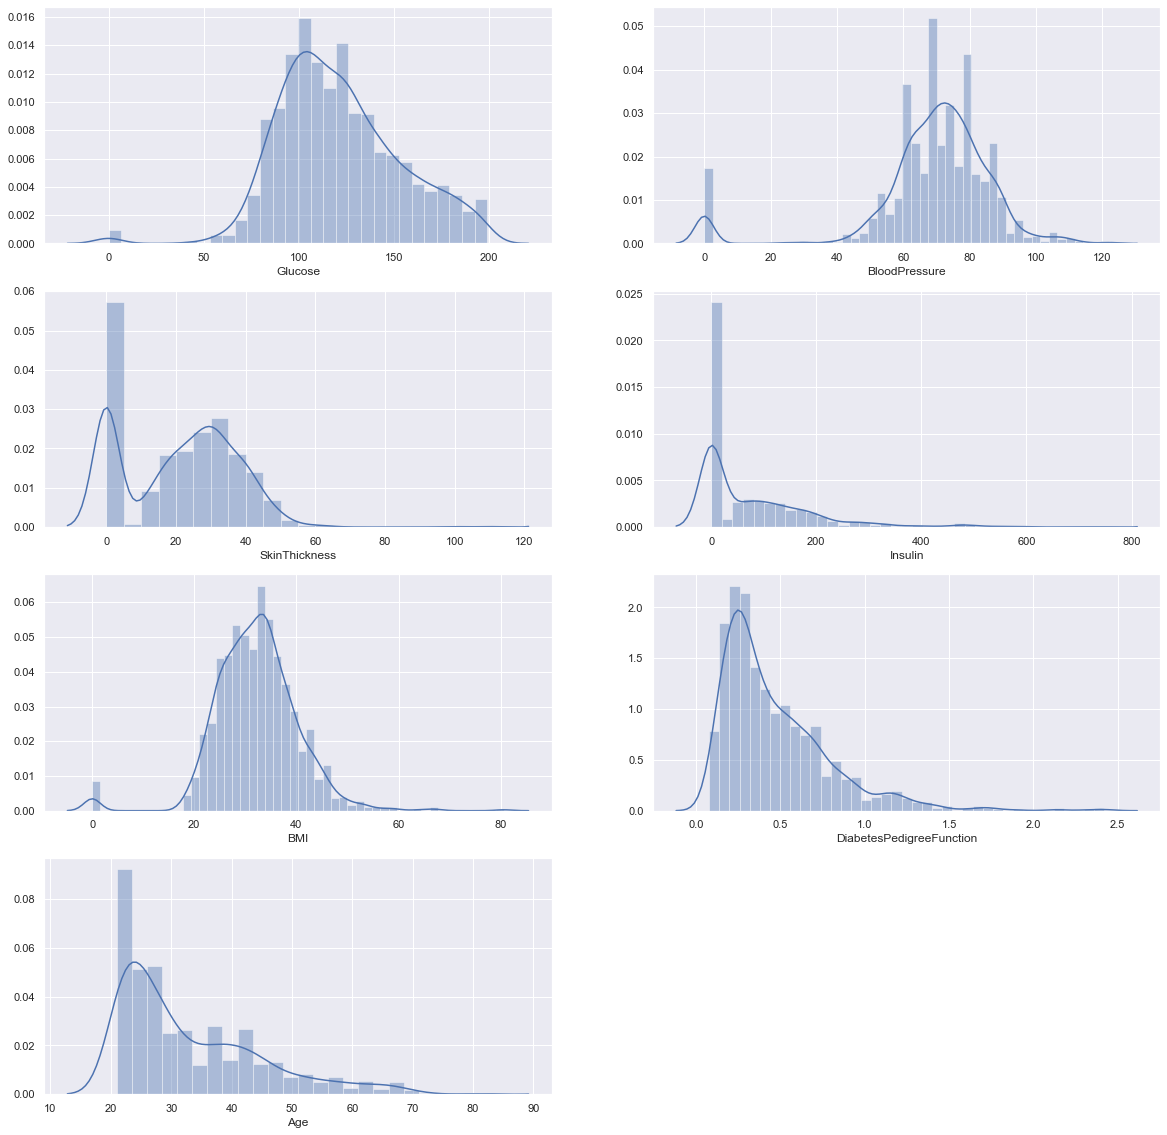

In [7]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(df[col])

    1. Insulin, DiabetesPedigreeFunction, Age are Positively skew.
    2. Glucose, BloodPressure, BMI are uniformally distributed.
    3. Glucose, BloodPressure, SkinThickness, Insulin, BMI contain zero values which in somecase acting like outliers

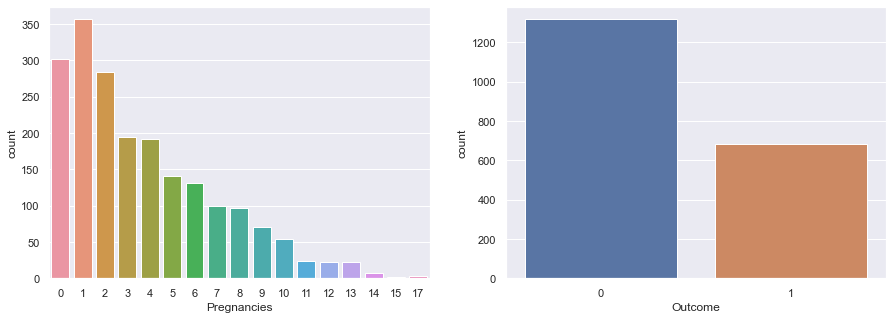

In [8]:
fig=plt.figure(figsize=(15,5))
for i,col in enumerate(['Pregnancies','Outcome']):
    ax=fig.add_subplot(1,2,i+1)
    sns.countplot(df[col])

    1. Out of 2000 records more then 1200 record have outcome as zero which means that these people don't have Diabetes, and more then 600 have outcome as 1 which means these people have Diabetes.
    2. Maximum records have 0,1 or 2 pregnancies.

### Bivariate Analysis 

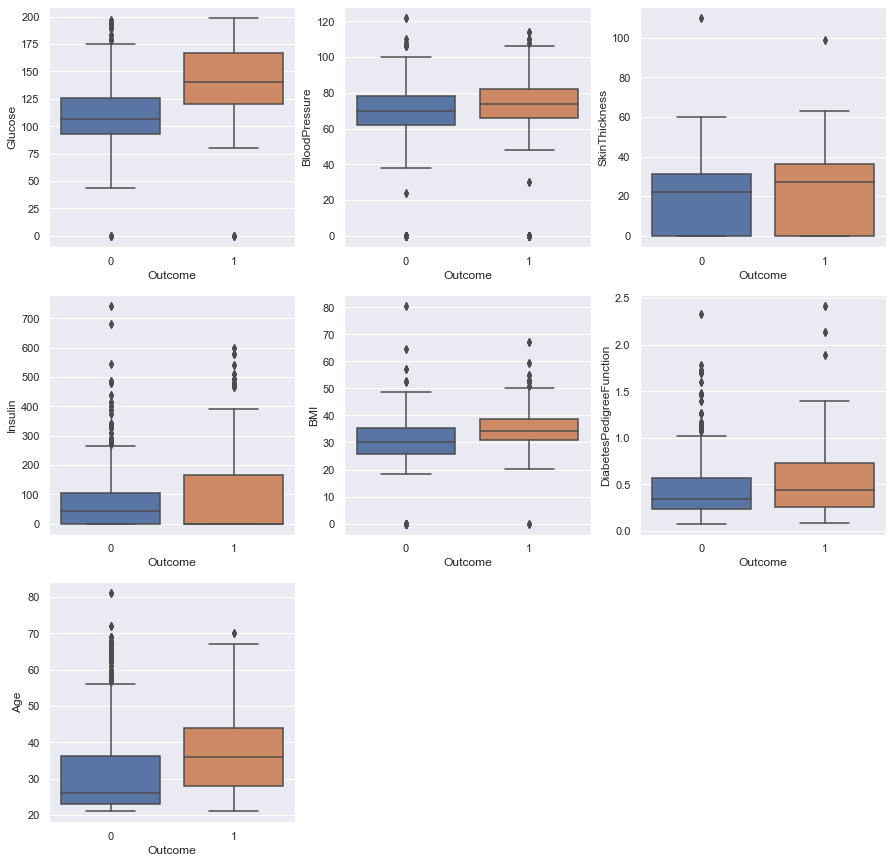

In [9]:
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=df[col],x=df['Outcome'])

    1. Boxplot shows attribute like Glucose, BMI, DiabetesPedigreeFunction, Age have much effect on Outcome as compair to other attributes

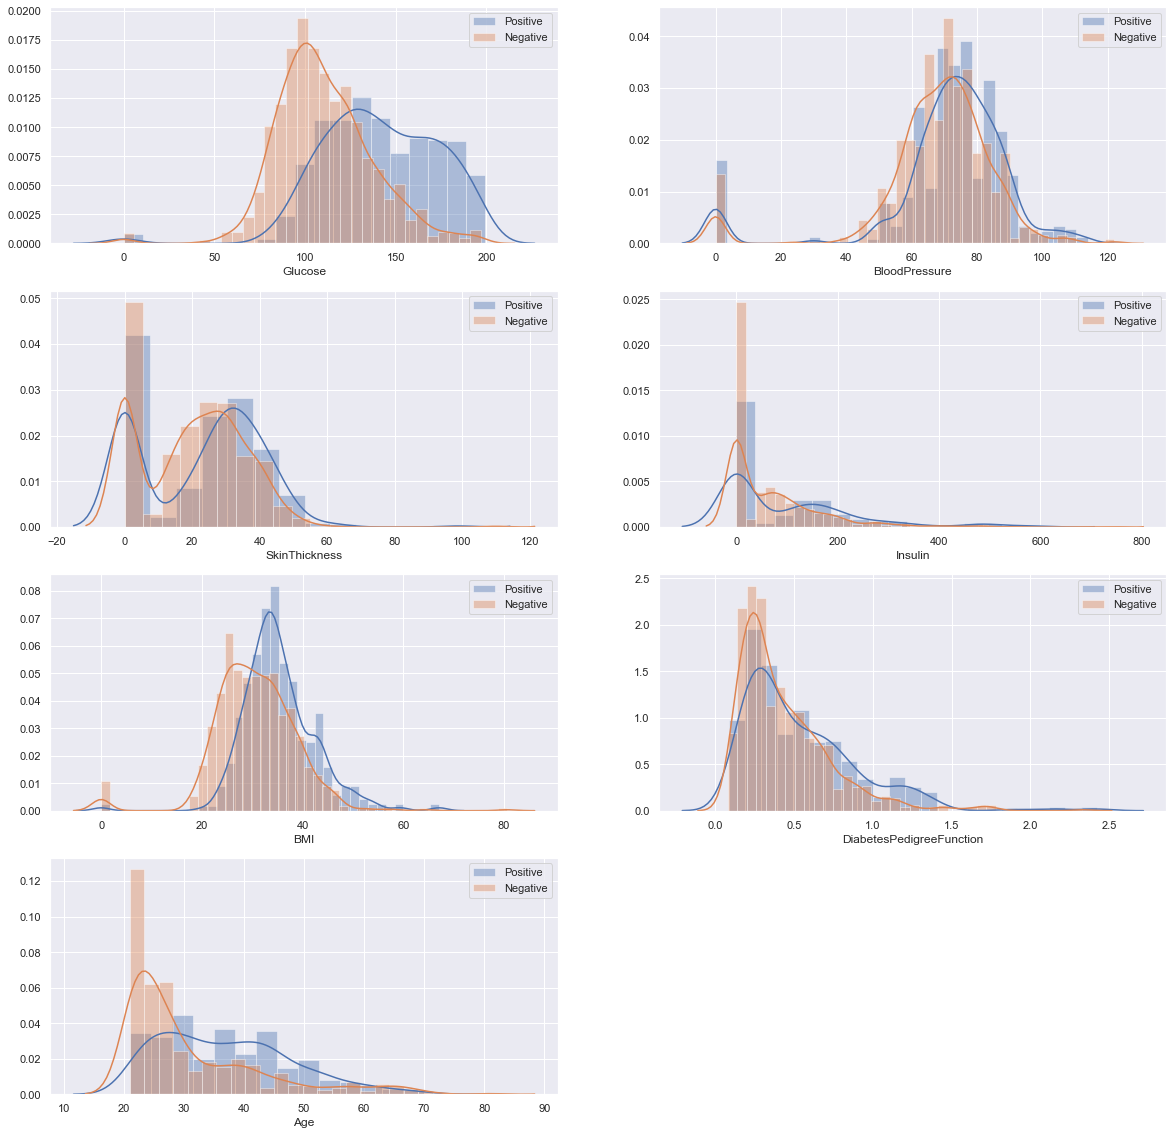

In [10]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    ax1=sns.distplot(df[col][df['Outcome']==1],label='Positive')
    sns.distplot(df[col][df['Outcome']==0],label='Negative',ax=ax1)
    plt.legend()

    1. Persons having Glucose approxly in range between 120 to 200 have high chances of having Positive Outcome.
    2. Persons having BloodPressure approxly in range 70 to 120 have high chances of having Positive Outcome.
    3. Persons having SkinThickness more then 30 -35 have high chances of having Positive Outcome.
    4. If a Person is having very low or high Insulin have high risk of Positive Outcome.
    5. Person with BMI more then 30-35 have high chances of having Diabetes.
    6. After age of 30 peoples usually have high chances of having Diabetes.

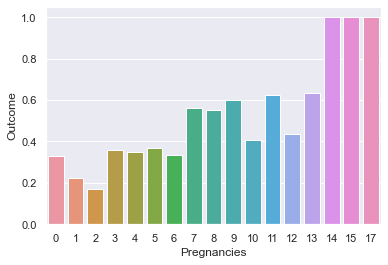

In [11]:
sns.barplot(x='Pregnancies',y='Outcome',data=df,ci=None)

    1. Graph clearly indicates that high number of Pregnancies have high risk of having Diabetes or Positive Outcome 

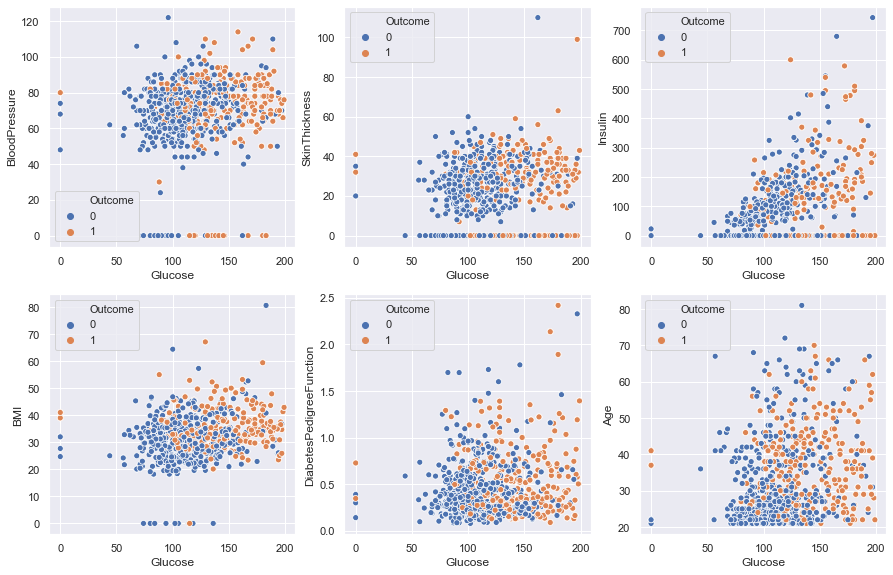

In [12]:
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(df.drop(['Pregnancies','Outcome','Glucose'],axis=1)):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot('Glucose',df[col],hue='Outcome',data=df)

    1. These plot clearly shows that high level of glucose is one of the major cause for diabetes.
    2. High level of Glucose with addition of high level of Insulin, Age, DiabetesPedigreeFunction contribute for Positive    Outcome

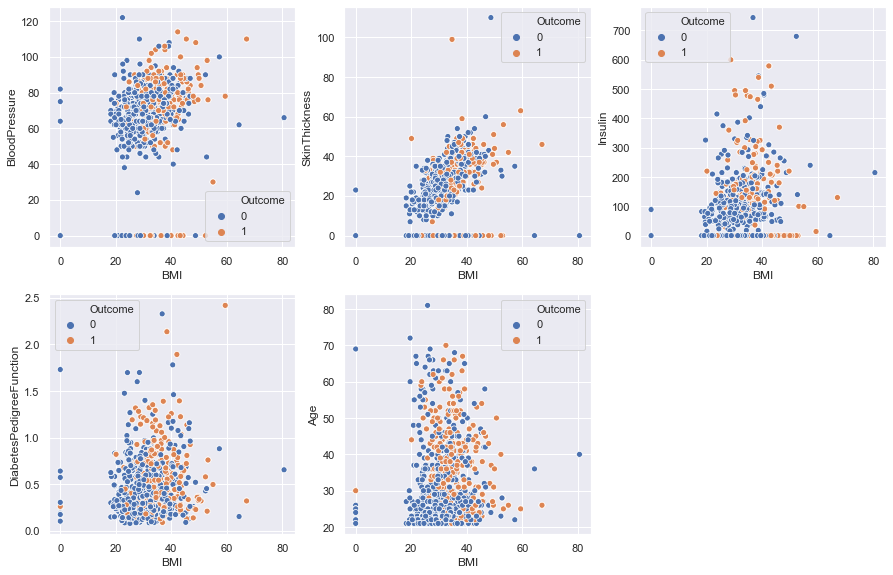

In [13]:
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(df.drop(['Pregnancies','Outcome','Glucose','BMI'],axis=1)):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot('BMI',df[col],hue='Outcome',data=df)

    BMI doesn't have much effect on the Outcome but other factor in addition to this like Age, Insulin causes effect on the outcome.

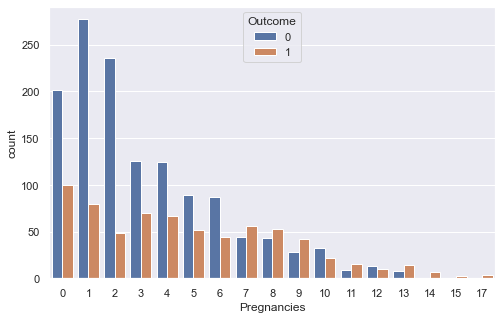

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pregnancies',hue='Outcome',data=df)

    Having low number of Pregnancies there is low risk of having Diabetes but as number of pregnancies increases the risk   also incerases 

# Feature Engineering

### Data Cleaning

In [15]:
df.duplicated().sum()

1256

dataframe contain duplicated value we need to drop them to prevent data leakage 

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(744, 9)

<b>Outliers Removal

In [18]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",len(out))
for col in df.drop('Outcome',axis=1).columns:
    iqr_outliers(df[col])

Outliers: 4
Outliers: 5
Outliers: 43
Outliers: 2
Outliers: 28
Outliers: 21
Outliers: 26
Outliers: 16


    Data contain outliers so we will replace them with median as removing them may lead to loss of important data of other  attributes.
    

In [19]:
for col in df.drop('Outcome',axis=1).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    
    df[col] = np.where((df[col]<Lower_tail) | (df[col]>Upper_tail), df[col].median(),df[col])

Finding Correlation among attributes

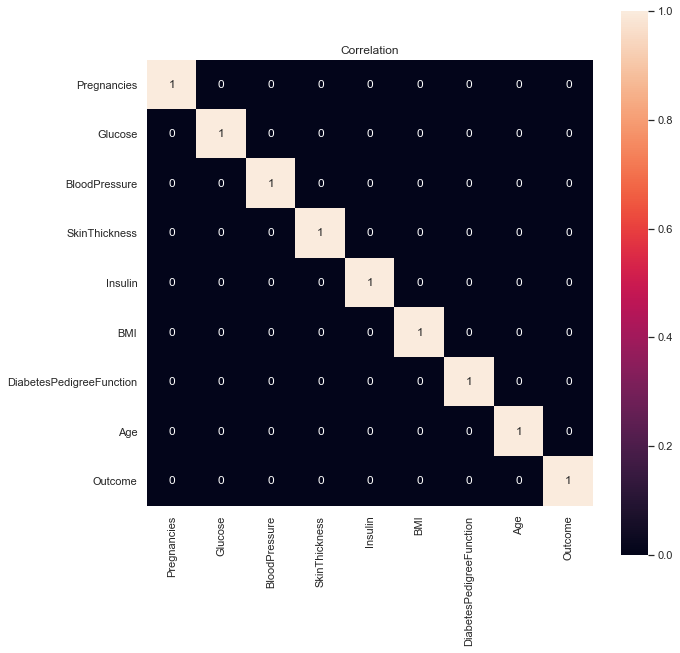

In [20]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True)

<b>Scaling

In [21]:
scaler=StandardScaler()

In [22]:
scaled_df=scaler.fit_transform(df.drop('Outcome',axis=1))

In [23]:
scaled_df=pd.DataFrame(scaled_df,columns=df.drop('Outcome',axis=1).columns)

In [24]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.522938,0.538020,-0.895981,0.910898,-0.791644,0.205544,-1.226359,1.394856
1,-1.142469,-1.242059,0.896462,0.656288,0.763879,0.917253,-0.800100,-0.882835
2,-1.142469,0.768772,0.000241,-1.316940,-0.791644,1.845570,0.796360,-0.123604
3,-1.142469,0.439127,-0.358248,1.356466,2.319401,1.551603,-0.269287,-0.787931
4,-0.832703,0.570985,-0.895981,1.292813,-0.343653,1.304052,0.418357,-1.072642


# Model Development

In [72]:
x=scaled_df
y=df.Outcome

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

### LogisticRegression

In [75]:
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [76]:
lm.fit(x_train,y_train)

LogisticRegression()

In [77]:
yhat_lm=lm.predict(x_test)

In [78]:
lm_score=f1_score(y_test,yhat_lm)
model_f1_score.append(lm_score)
lm_score

0.6346153846153847

In [79]:
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.7449664429530202

In [80]:
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.74      0.89      0.80        88
           1       0.77      0.54      0.63        61

    accuracy                           0.74       149
   macro avg       0.75      0.71      0.72       149
weighted avg       0.75      0.74      0.73       149



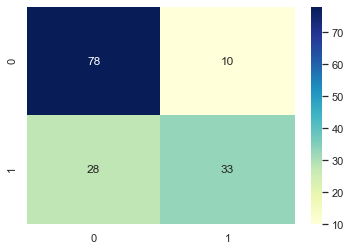

In [81]:
sns.heatmap(confusion_matrix(y_test,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

### DecisionTreeClassifier

In [82]:
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()

In [83]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
yhat_tree=tree.predict(x_test)

In [85]:
tree_score=f1_score(y_test,yhat_tree)
model_f1_score.append(tree_score)
tree_score

0.6363636363636364

In [86]:
tree_accuracy=accuracy_score(y_test,yhat_tree)
model_accuracy_score.append(tree_accuracy)
tree_accuracy

0.7315436241610739

In [87]:
print(classification_report(y_test,yhat_tree))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        88
           1       0.71      0.57      0.64        61

    accuracy                           0.73       149
   macro avg       0.73      0.71      0.71       149
weighted avg       0.73      0.73      0.73       149



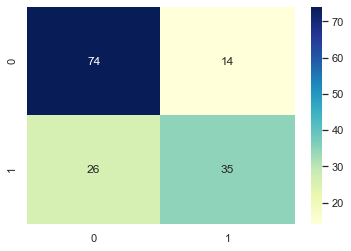

In [88]:
sns.heatmap(confusion_matrix(y_test,yhat_tree),annot=True,fmt='',cmap='YlGnBu')

### RandomForestClassifier

In [89]:
model_list.append('RandomForestClassifier')
forest=RandomForestClassifier()

In [90]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
yhat_forest=forest.predict(x_test)

In [92]:
forest_score=f1_score(y_test,yhat_forest)
model_f1_score.append(forest_score)
forest_score

0.6476190476190475

In [93]:
forest_accuracy=accuracy_score(y_test,yhat_forest)
model_accuracy_score.append(forest_accuracy)
forest_accuracy

0.7516778523489933

In [94]:
print(classification_report(y_test,yhat_forest))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        88
           1       0.77      0.56      0.65        61

    accuracy                           0.75       149
   macro avg       0.76      0.72      0.73       149
weighted avg       0.76      0.75      0.74       149



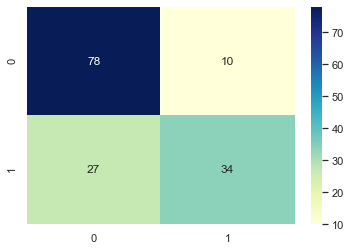

In [95]:
sns.heatmap(confusion_matrix(y_test,yhat_forest),annot=True,fmt='',cmap='YlGnBu')

### SVC

In [96]:
model_list.append('SVC')
svc=SVC()

In [97]:
svc.fit(x_train,y_train)

SVC()

In [98]:
yhat_svc=svc.predict(x_test)

In [99]:
svc_score=f1_score(y_test,yhat_svc)
model_f1_score.append(svc_score)
svc_score

0.6862745098039217

In [100]:
svc_accuracy=accuracy_score(y_test,yhat_svc)
model_accuracy_score.append(svc_accuracy)
svc_accuracy

0.785234899328859

In [101]:
print(classification_report(y_test,yhat_svc))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        88
           1       0.85      0.57      0.69        61

    accuracy                           0.79       149
   macro avg       0.81      0.75      0.76       149
weighted avg       0.80      0.79      0.78       149



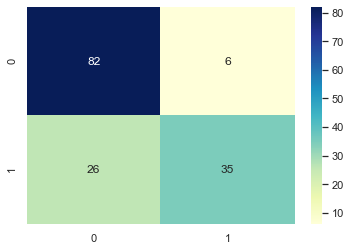

In [102]:
sns.heatmap(confusion_matrix(y_test,yhat_svc),annot=True,fmt='',cmap='YlGnBu')

### KNeighborsClassifier

In [103]:
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()

In [104]:
neighbour.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
yhat_neighbour=neighbour.predict(x_test)

In [106]:
neighbour_score=f1_score(y_test,yhat_neighbour)
model_f1_score.append(neighbour_score)
neighbour_score

0.5742574257425742

In [107]:
neighbour_accuracy=accuracy_score(y_test,yhat_neighbour)
model_accuracy_score.append(neighbour_accuracy)
neighbour_accuracy

0.7114093959731543

In [108]:
print(classification_report(y_test,yhat_neighbour))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78        88
           1       0.72      0.48      0.57        61

    accuracy                           0.71       149
   macro avg       0.72      0.68      0.68       149
weighted avg       0.71      0.71      0.70       149



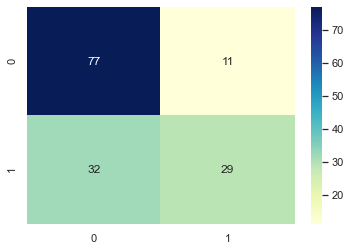

In [109]:
sns.heatmap(confusion_matrix(y_test,yhat_neighbour),annot=True,fmt='',cmap='YlGnBu')

### GaussianNB

In [110]:
model_list.append('GaussianNB')
naive=GaussianNB()

In [111]:
naive.fit(x_train,y_train)

GaussianNB()

In [112]:
yhat_naive=naive.predict(x_test)

In [113]:
naive_score=f1_score(y_test,yhat_naive)
model_f1_score.append(naive_score)
naive_score

0.6607142857142857

In [114]:
naive_accuracy=accuracy_score(y_test,yhat_naive)
model_accuracy_score.append(naive_accuracy)
naive_accuracy

0.7449664429530202

In [115]:
print(classification_report(y_test,yhat_naive))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        88
           1       0.73      0.61      0.66        61

    accuracy                           0.74       149
   macro avg       0.74      0.72      0.73       149
weighted avg       0.74      0.74      0.74       149



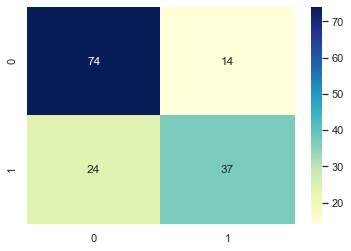

In [116]:
sns.heatmap(confusion_matrix(y_test,yhat_naive),annot=True,fmt='',cmap='YlGnBu')

# Conclusion

### F1-Score

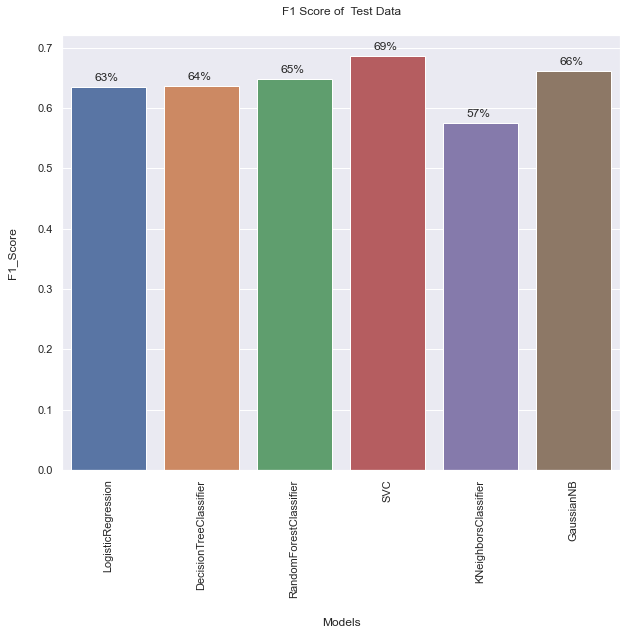

In [117]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1_score)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

### Accuracy Score

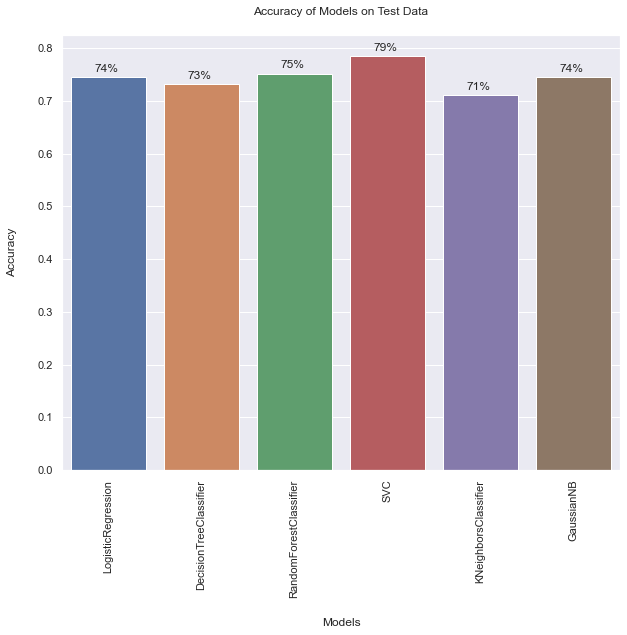

In [118]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))